<a href="https://colab.research.google.com/github/GusRaymundi/PDI/blob/main/LAB3_Filtragem_Espacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB3 — Filtragens no Domínio Espacial

Disciplina: **Processamento Digital de Imagens (PDI)** – UFPel  
Professor: **Guilherme Corrêa**  

Este notebook introduz e pratica os conceitos de **filtragens no domínio espacial** em imagens digitais.

---

## Objetivos  
- Carregar e visualizar imagens em escala de cinza.  
- Exercitar a convolução de filtros sobre imagens.  
- Realizar filtragem para suavização de imagens.  
- Realizar filtragem para realce de imagens.  
- Comparar os efeitos visuais das diferentes filtragens.  

---

## 1) Bibliotecas úteis
Se estiver no Colab, rode a célula de instalação uma única vez.

In [ ]:
# Se necessário no Colab, descomente a linha abaixo:
#!pip -q install numpy matplotlib scikit-image imageio

In [26]:
# %% setup - Importações e funções utilitárias
import numpy as np
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

In [27]:
def converte_cinza(figura):
    """
    Recebe o caminho de uma imagem BMP, converte para escala de cinza, salva a imagem, retorna o caminho.
    """
    # Carrega a imagem BMP e converte para escala de cinza
    path = Path(figura)
    img = Image.open(figura).convert('L')

    # Salva a imagem em escala de cinza
    out_path = path.with_name(path.stem + "_cinza.bmp")
    img.save(out_path, format="BMP")

    return str(out_path)

## 2) Filtro Gaussiano para Suavização
Vamos criar uma função **Python** que:
- **Receba** o caminho de uma imagem BMP em escala de cinza.
- **Suavize** a imagem aplicando um filtro gaussiano 3x3 (σ=1) com a seguinte máscara:

$$
\dfrac{1}{16}
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}
$$

- **Salve** a imagem num arquivo BMP.
- **Retorne** o caminho da imagem salva.

Nome sugerido para a função: `suaviza_gaussiano_3x3(figura)`.

In [28]:
def suaviza_gaussiano_3x3(figura):

    """
    Recebe caminho de uma imagem em escala de cinza (BMP),
    aplica convolução com a máscara 3x3 (gaussiano com sigma=1):
        (1/16) * [[1,2,1],
                  [2,4,2],
                  [1,2,1]]
    Salva a imagem suavizada em BMP e retorna o caminho do arquivo gerado.
    """

    path = Path(figura)   # "figura" deve já estar em escala de cinza
    img = Image.open(path)
    arr = np.asarray(img, dtype=np.uint8)

    # padding 'reflect' para evitar bordas escuras
    p = np.pad(arr, ((1,1),(1,1)), mode='reflect').astype(np.float32)

    # Convolução vetorizada (soma ponderada das vizinhanças 3x3) -- vetorização processa todos os pixels de uma vez, sem laços!
    out = (
        1*p[0:-2, 0:-2] + 2*p[0:-2, 1:-1] + 1*p[0:-2, 2:] +
        2*p[1:-1, 0:-2] + 4*p[1:-1, 1:-1] + 2*p[1:-1, 2:] +
        1*p[2:  , 0:-2] + 2*p[2:  , 1:-1] + 1*p[2:  , 2:]
    ) / 16.0

    out = np.clip(out, 0, 255).astype(np.uint8)

    out_path = path.with_name(path.stem + "_suave_g3x3.bmp")
    Image.fromarray(out, mode='L').save(out_path, format="BMP")

    return str(out_path)

Crie abaixo o código de chamada desta função criada.

Não esqueça de fazer upload da imagem BMP (exemplo disponível no github) para o ambiente Colab.

In [29]:
img_cinza = converte_cinza('lena_lc.bmp')
saida = suaviza_gaussiano_3x3(img_cinza)
saida2 = suaviza_gaussiano_3x3(saida)
saida3 = suaviza_gaussiano_3x3(saida2)
saida4 = suaviza_gaussiano_3x3(saida3)
saida5 = suaviza_gaussiano_3x3(saida4)
saida6 = suaviza_gaussiano_3x3(saida5)
print("Imagem suavizada salva em:", saida5)

Imagem suavizada salva em: lena_lc_cinza_suave_g3x3_suave_g3x3_suave_g3x3_suave_g3x3_suave_g3x3.bmp


/tmp/ipython-input-3673026888.py:29: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(out, mode='L').save(out_path, format="BMP")


---
# 🖼️ Tarefa A — Alterando o Nível de Suavização

Primeiro vamos fazer assim:

1. **Aplique** o filtro várias vezes. Ou seja, aplique o filtro sobre a imagem filtrada repetidamente. Veja o resultado.

Agora vamos tentar uma maneira diferente.
Vamos aumentar o tamanho do kernel de filtragem.

2. **Crie** novas funções `suaviza_gaussiano_5x5(figura)` e `suaviza_gaussiano_7x7(figura)` copiando a anterior.
3. **Modifique** o kernel de filtragem para os tamanhos 5x5 e 7x7, conforme trechos abaixo (σ=1).
3. **Coloque lado a lado e compare** a aplicação dos filtros. Por que o tamanho do filtro influencia na suavização?  

**Filtro 5x5:**

$$
\frac{1}{256}
\begin{bmatrix}
1 & 4 & 6 & 4 & 1 \\
4 & 16 & 24 & 16 & 4 \\
6 & 24 & 36 & 24 & 6 \\
4 & 16 & 24 & 16 & 4 \\
1 & 4 & 6 & 4 & 1
\end{bmatrix}
$$

```
    out = (
          1 * p[0:-4, 0:-4] +  4 * p[0:-4, 1:-3] +  6 * p[0:-4, 2:-2] +  4 * p[0:-4, 3:-1] +  1 * p[0:-4, 4:]
        + 4 * p[1:-3, 0:-4] + 16 * p[1:-3, 1:-3] + 24 * p[1:-3, 2:-2] + 16 * p[1:-3, 3:-1] +  4 * p[1:-3, 4:]
        + 6 * p[2:-2, 0:-4] + 24 * p[2:-2, 1:-3] + 36 * p[2:-2, 2:-2] + 24 * p[2:-2, 3:-1] +  6 * p[2:-2, 4:]
        + 4 * p[3:-1, 0:-4] + 16 * p[3:-1, 1:-3] + 24 * p[3:-1, 2:-2] + 16 * p[3:-1, 3:-1] +  4 * p[3:-1, 4:]
        + 1 * p[4:  , 0:-4] +  4 * p[4:  , 1:-3] +  6 * p[4:  , 2:-2] +  4 * p[4:  , 3:-1] +  1 * p[4:  , 4:]
    ) / 256.0
```

**Filtro 7x7:**

$$
\dfrac{1}{4096}
\begin{bmatrix}
1   & 6   & 15  & 20  & 15  & 6   & 1 \\
6   & 36  & 90  & 120 & 90  & 36  & 6 \\
15  & 90  & 225 & 300 & 225 & 90  & 15 \\
20  & 120 & 300 & 400 & 300 & 120 & 20 \\
15  & 90  & 225 & 300 & 225 & 90  & 15 \\
6   & 36  & 90  & 120 & 90  & 36  & 6 \\
1   & 6   & 15  & 20  & 15  & 6   & 1
\end{bmatrix}
$$

```
    out = (
          1*p[0:-6, 0:-6] +   6*p[0:-6, 1:-5] +  15*p[0:-6, 2:-4] +  20*p[0:-6, 3:-3] +  15*p[0:-6, 4:-2] +   6*p[0:-6, 5:-1] + 1*p[0:-6, 6:] +
          6*p[1:-5, 0:-6] +  36*p[1:-5, 1:-5] +  90*p[1:-5, 2:-4] + 120*p[1:-5, 3:-3] +  90*p[1:-5, 4:-2] +  36*p[1:-5, 5:-1] + 6*p[1:-5, 6:] +
         15*p[2:-4, 0:-6] +  90*p[2:-4, 1:-5] + 225*p[2:-4, 2:-4] + 300*p[2:-4, 3:-3] + 225*p[2:-4, 4:-2] +  90*p[2:-4, 5:-1] +15*p[2:-4, 6:] +
         20*p[3:-3, 0:-6] + 120*p[3:-3, 1:-5] + 300*p[3:-3, 2:-4] + 400*p[3:-3, 3:-3] + 300*p[3:-3, 4:-2] + 120*p[3:-3, 5:-1] +20*p[3:-3, 6:] +
         15*p[4:-2, 0:-6] +  90*p[4:-2, 1:-5] + 225*p[4:-2, 2:-4] + 300*p[4:-2, 3:-3] + 225*p[4:-2, 4:-2] +  90*p[4:-2, 5:-1] +15*p[4:-2, 6:] +
          6*p[5:-1, 0:-6] +  36*p[5:-1, 1:-5] +  90*p[5:-1, 2:-4] + 120*p[5:-1, 3:-3] +  90*p[5:-1, 4:-2] +  36*p[5:-1, 5:-1] + 6*p[5:-1, 6:] +
          1*p[6:  , 0:-6] +   6*p[6:  , 1:-5] +  15*p[6:  , 2:-4] +  20*p[6:  , 3:-3] +  15*p[6:  , 4:-2] +   6*p[6:  , 5:-1] + 1*p[6:  , 6:]
    ) / 4096.0
```

In [30]:
def suaviza_gaussiano_3x3(figura):
    path = Path(figura)
    img = Image.open(path)
    arr = np.asarray(img, dtype=np.uint8)
    p = np.pad(arr, ((1,1),(1,1)), mode='reflect').astype(np.float32)
    out = (
        1*p[0:-2, 0:-2] + 2*p[0:-2, 1:-1] + 1*p[0:-2, 2:] +
        2*p[1:-1, 0:-2] + 4*p[1:-1, 1:-1] + 2*p[1:-1, 2:] +
        1*p[2:  , 0:-2] + 2*p[2:  , 1:-1] + 1*p[2:  , 2:]
    ) / 16.0
    out = np.clip(out, 0, 255).astype(np.uint8)
    out_path = path.with_name(path.stem + "_suave_g3x3.bmp")
    Image.fromarray(out, mode='L').save(out_path, format="BMP")
    return str(out_path)

In [31]:
def suaviza_gaussiano_5x5(figura):
    path = Path(figura)
    img = Image.open(path)
    arr = np.asarray(img, dtype=np.uint8)
    p = np.pad(arr, ((2,2),(2,2)), mode='reflect').astype(np.float32)
    out = (
          1 * p[0:-4, 0:-4] +  4 * p[0:-4, 1:-3] +  6 * p[0:-4, 2:-2] +  4 * p[0:-4, 3:-1] +  1 * p[0:-4, 4:] +
          4 * p[1:-3, 0:-4] + 16 * p[1:-3, 1:-3] + 24 * p[1:-3, 2:-2] + 16 * p[1:-3, 3:-1] +  4 * p[1:-3, 4:] +
          6 * p[2:-2, 0:-4] + 24 * p[2:-2, 1:-3] + 36 * p[2:-2, 2:-2] + 24 * p[2:-2, 3:-1] +  6 * p[2:-2, 4:] +
          4 * p[3:-1, 0:-4] + 16 * p[3:-1, 1:-3] + 24 * p[3:-1, 2:-2] + 16 * p[3:-1, 3:-1] +  4 * p[3:-1, 4:] +
          1 * p[4:  , 0:-4] +  4 * p[4:  , 1:-3] +  6 * p[4:  , 2:-2] +  4 * p[4:  , 3:-1] +  1 * p[4:  , 4:]
    ) / 256.0
    out = np.clip(out, 0, 255).astype(np.uint8)
    out_path = path.with_name(path.stem + "_suave_g5x5.bmp")
    Image.fromarray(out, mode='L').save(out_path, format="BMP")
    return str(out_path)

In [32]:
def suaviza_gaussiano_7x7(figura):
    path = Path(figura)
    img = Image.open(path)
    arr = np.asarray(img, dtype=np.uint8)
    p = np.pad(arr, ((3,3),(3,3)), mode='reflect').astype(np.float32)
    out = (
          1*p[0:-6, 0:-6] +   6*p[0:-6, 1:-5] +  15*p[0:-6, 2:-4] +  20*p[0:-6, 3:-3] +  15*p[0:-6, 4:-2] +   6*p[0:-6, 5:-1] + 1*p[0:-6, 6:] +
          6*p[1:-5, 0:-6] +  36*p[1:-5, 1:-5] +  90*p[1:-5, 2:-4] + 120*p[1:-5, 3:-3] +  90*p[1:-5, 4:-2] +  36*p[1:-5, 5:-1] + 6*p[1:-5, 6:] +
         15*p[2:-4, 0:-6] +  90*p[2:-4, 1:-5] + 225*p[2:-4, 2:-4] + 300*p[2:-4, 3:-3] + 225*p[2:-4, 4:-2] +  90*p[2:-4, 5:-1] +15*p[2:-4, 6:] +
         20*p[3:-3, 0:-6] + 120*p[3:-3, 1:-5] + 300*p[3:-3, 2:-4] + 400*p[3:-3, 3:-3] + 300*p[3:-3, 4:-2] + 120*p[3:-3, 5:-1] +20*p[3:-3, 6:] +
         15*p[4:-2, 0:-6] +  90*p[4:-2, 1:-5] + 225*p[4:-2, 2:-4] + 300*p[4:-2, 3:-3] + 225*p[4:-2, 4:-2] +  90*p[4:-2, 5:-1] +15*p[4:-2, 6:] +
          6*p[5:-1, 0:-6] +  36*p[5:-1, 1:-5] +  90*p[5:-1, 2:-4] + 120*p[5:-1, 3:-3] +  90*p[5:-1, 4:-2] +  36*p[5:-1, 5:-1] + 6*p[5:-1, 6:] +
          1*p[6:  , 0:-6] +   6*p[6:  , 1:-5] +  15*p[6:  , 2:-4] +  20*p[6:  , 3:-3] +  15*p[6:  , 4:-2] +   6*p[6:  , 5:-1] + 1*p[6:  , 6:]
    ) / 4096.0
    out = np.clip(out, 0, 255).astype(np.uint8)
    out_path = path.with_name(path.stem + "_suave_g7x7.bmp")
    Image.fromarray(out, mode='L').save(out_path, format="BMP")
    return str(out_path)

/tmp/ipython-input-1592008347.py:13: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(out, mode='L').save(out_path, format="BMP")
/tmp/ipython-input-3751777207.py:15: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(out, mode='L').save(out_path, format="BMP")
/tmp/ipython-input-3339659960.py:17: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(out, mode='L').save(out_path, format="BMP")


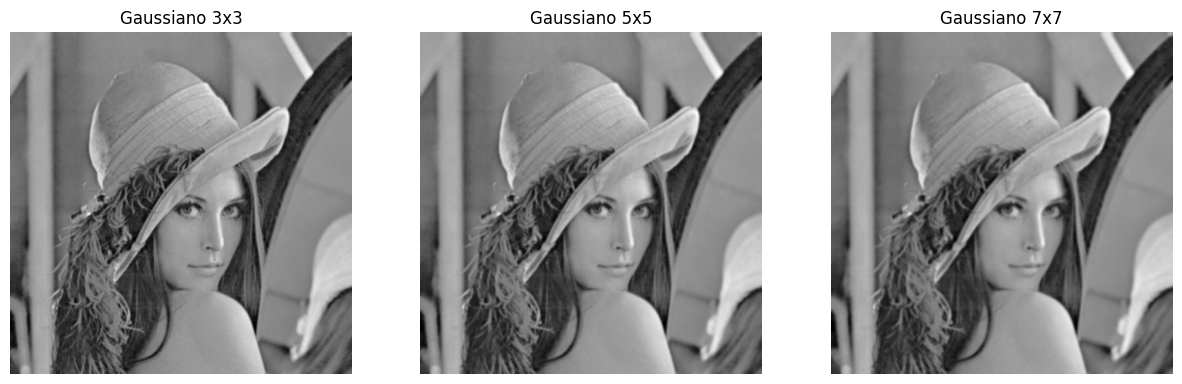

In [33]:
img_cinza = converte_cinza("lena_lc.bmp")

img3 = suaviza_gaussiano_3x3(img_cinza)
img5 = suaviza_gaussiano_5x5(img_cinza)
img7 = suaviza_gaussiano_7x7(img_cinza)

# Mostrar lado a lado
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(Image.open(img3), cmap='gray')
ax[0].set_title("Gaussiano 3x3")
ax[1].imshow(Image.open(img5), cmap='gray')
ax[1].set_title("Gaussiano 5x5")
ax[2].imshow(Image.open(img7), cmap='gray')
ax[2].set_title("Gaussiano 7x7")

for a in ax:
    a.axis('off')
plt.show()


---
# 🖼️ Tarefa B — Alterando o Nível de Suavização com Funções Prontas

Tudo isso que fizemos já está implementado e disponível em diferentes bibliotecas! 😆😆😆

Você não precisa construir manualmente os kernels (mas fizemos para aprender). As principais bibliotecas de processamento de imagens já trazem a filtragem Gaussiana pronta, aceitando o tamanho do kernel e o σ (sigma) como parâmetros.

**A sua tarefa é experimentar o uso dessas diferentes funções e analisar os seus efeitos com diferentes tamanhos de kernels e valores de sigma!**

<br>

📌 **OpenCV — cv2.GaussianBlur**

```
import cv2

# img = imagem em escala de cinza (numpy uint8)
# ksize = (largura, altura -- tamanho do kernel (deve ser ímpar))
# sigmaX = desvio-padrão da gaussiana

suavizada = cv2.GaussianBlur(img, ksize, sigmaX)
```
- Você pode alterar `ksize` ou `sigmaX`, mas não os dois juntos.
- Muito prático para experimentar diferentes graus de suavização!

<br>

📌 **SciPy — scipy.ndimage.gaussian_filter**

```
from scipy.ndimage import gaussian_filter

suavizada = gaussian_filter(img, sigma=2)
```

- Aqui você passa direto o σ (sigma).

- O tamanho do kernel é escolhido automaticamente de acordo com o σ (em torno de
6σ).

<br>

📌 **scikit-image — skimage.filters.gaussian**

```
from skimage.filters import gaussian

suavizada = gaussian(img, sigma=2, truncate=3.0, preserve_range=True)
suavizada = (suavizada * 255).astype("uint8")  # se quiser voltar para 0–255
```
- Permite escolher σ e até se aplica em imagens RGB.


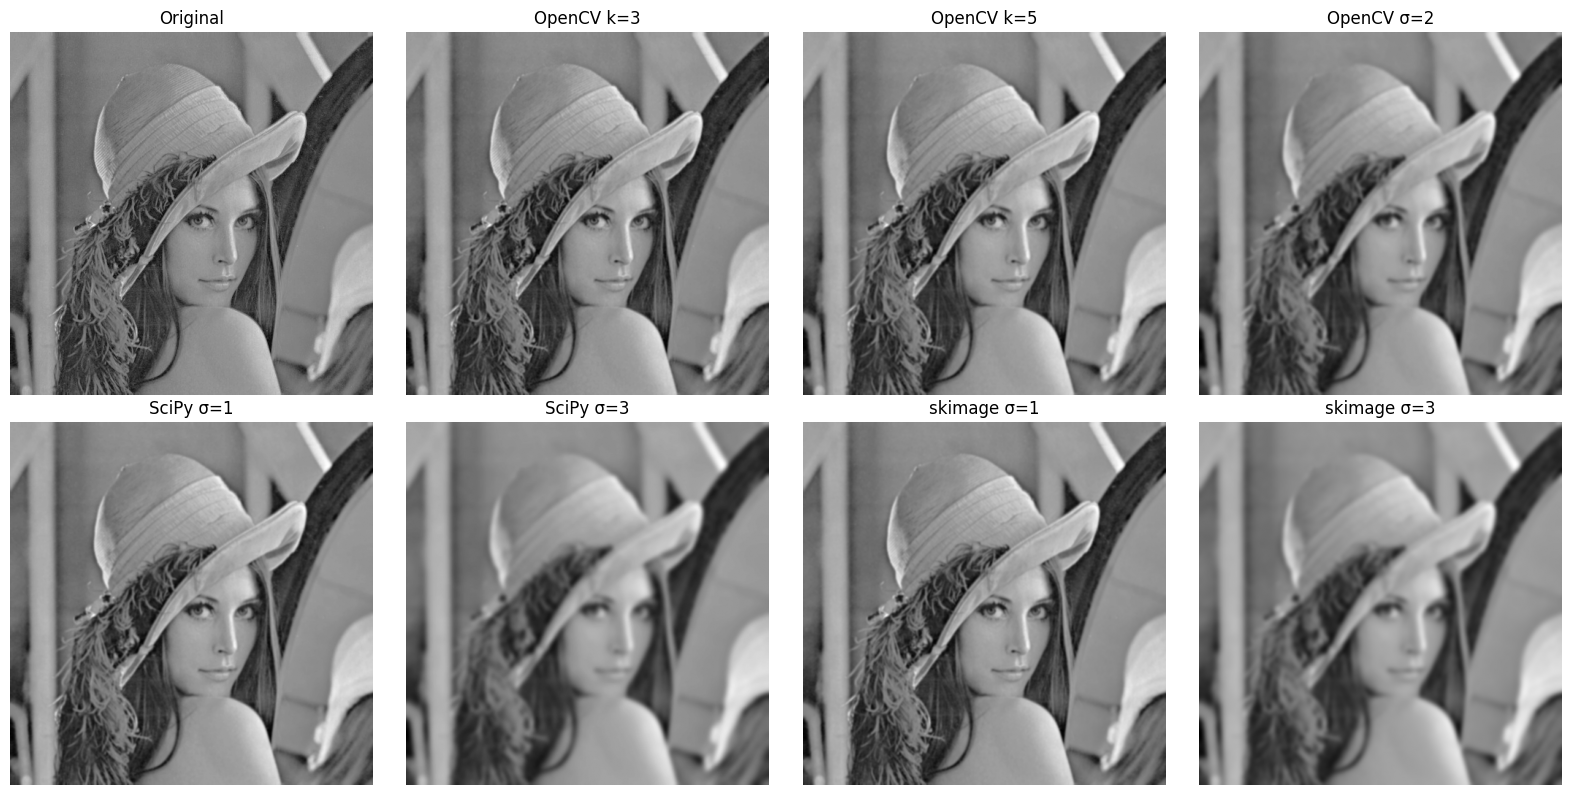

In [38]:
# %% Tarefa B - Suavização Gaussiana com funções prontas

import cv2
from scipy.ndimage import gaussian_filter
from skimage.filters import gaussian

# Carregar imagem em escala de cinza (com PIL e converter para numpy)
img_cinza = converte_cinza("lena_lc.bmp")
arr = np.array(Image.open(img_cinza), dtype=np.uint8)

# --------------------------
# OpenCV - GaussianBlur
# --------------------------
suave_cv2_k3 = cv2.GaussianBlur(arr, (3,3), 0)   # kernel 3x3
suave_cv2_k5 = cv2.GaussianBlur(arr, (5,5), 0)   # kernel 5x5
suave_cv2_s2 = cv2.GaussianBlur(arr, (0,0), 2)   # sigma=2 (kernel automático)

# --------------------------
# SciPy - gaussian_filter
# --------------------------
suave_scipy_s1 = gaussian_filter(arr, sigma=1)
suave_scipy_s3 = gaussian_filter(arr, sigma=3)

# --------------------------
# scikit-image - gaussian
# --------------------------
suave_skimg_s1 = gaussian(arr, sigma=1, truncate=3.0, preserve_range=True)
#suave_skimg_s1 = (suave_skimg_s1).astype("uint8")

suave_skimg_s3 = gaussian(arr, sigma=3, truncate=3.0, preserve_range=True)
#suave_skimg_s3 = (suave_skimg_s3).astype("uint8")

# --------------------------
# Mostrar resultados lado a lado
# --------------------------
fig, ax = plt.subplots(2, 4, figsize=(16,8))

ax[0,0].imshow(arr, cmap="gray"); ax[0,0].set_title("Original"); ax[0,0].axis("off")
ax[0,1].imshow(suave_cv2_k3, cmap="gray"); ax[0,1].set_title("OpenCV k=3"); ax[0,1].axis("off")
ax[0,2].imshow(suave_cv2_k5, cmap="gray"); ax[0,2].set_title("OpenCV k=5"); ax[0,2].axis("off")
ax[0,3].imshow(suave_cv2_s2, cmap="gray"); ax[0,3].set_title("OpenCV σ=2"); ax[0,3].axis("off")

ax[1,0].imshow(suave_scipy_s1, cmap="gray"); ax[1,0].set_title("SciPy σ=1"); ax[1,0].axis("off")
ax[1,1].imshow(suave_scipy_s3, cmap="gray"); ax[1,1].set_title("SciPy σ=3"); ax[1,1].axis("off")
ax[1,2].imshow(suave_skimg_s1, cmap="gray"); ax[1,2].set_title("skimage σ=1"); ax[1,2].axis("off")
ax[1,3].imshow(suave_skimg_s3, cmap="gray"); ax[1,3].set_title("skimage σ=3"); ax[1,3].axis("off")

plt.tight_layout()
plt.show()
